
**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/ML/MLFH\ 3.0/data/medical-charges

medical-charges.csv


In [ ]:
medical_df = pd.read_csv("/content/drive/MyDrive/ML/MLFH 3.0/data/medical-charges/medical-charges.csv")

In [ ]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Для вирішення задачі прогнозування колонки charges на основі інших колонок виходячи з наявних на даний момент знань я б зробив наступні кроки:
1. EDA датасету з візуалізаціями для розуміння характеристик даних та попередньої їх оцінки
2. Визначення кореляції між фічами та таргетом для визначення найвпливовіших колонок для цільової (предикторів)
3. Можливо побудував би базові прості лінійні формули прогнозування charges від основних предикторів для визначення вагів
4. Створив би загальну формулу (якщо б зміг :) прогнозування таргету від вхідних даних основних предикторів

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['goldenrod', 'blue'],
                   title='Amount of Charges by Sex')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження:**
- Медіана жіночих та чоловічих медичних видатків майже однакова
- Хоча дані жіночих видатків на страховку розташовані більш компактно ніж чоловічі
- Для жінок видатки більше за 29к вже вважаються викидами, для чоловіків - більше 40.7к

In [ ]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['goldenrod', 'blue', 'green', 'red'],
                   title='Amount of Charges by Region')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження:**
- Дані медичних витрат на страховку відрізняються в залежності від регіону
- Західні регіони в середньому платять трохи менше за східні
- Південно-західний регіон характеризується найменшою медіаною та щільнішим розподілом відносно інших регіонів
- У північно-східного найбільша медіана, а південно-східного найбільший розкид даних

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [ ]:
fig = px.histogram(medical_df,
                   x='region',
                   color='smoker',
                   color_discrete_sequence=['red', 'green'],
                   title='Smokers in regions')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження:**
- В кожному регіоні некурящих заявників більше ніж курців
- Більший відсоток курців у східних регіонах (Південно-східний - 25%, північно-східний - 20%) ніж у західних регіонах (18%)

In [ ]:
fig = px.histogram(medical_df,
                   x='children',
                   color='smoker',
                   color_discrete_sequence=['red', 'green'],
                   title='Smokers with children')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження:**
- Курці у всіх категоріях в меншості (19-25% вибірки)
- Наменше курців серед людей з 4-5 дітьми (серед них курці 12 і 5% відповідно)
- Однак таке відхилення може бути пов'язано із малою кількістю спостережень багатодітних сімей

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [ ]:
fig = px.violin(medical_df,
                x='charges',
                color='children',
                box=True,
                title='Charges by Number of Children',
                category_orders={"children": sorted(medical_df['children'].unique())})
fig.show()

**Спостереження:**
- Кількість дітей не має очевидного впливу на рівень медичних витрат.
- Для людей з 4–5 дітьми витрати виглядають стабільнішими, що може бути пов’язано з невеликою кількістю спостережень у цих групах.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [ ]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [ ]:
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

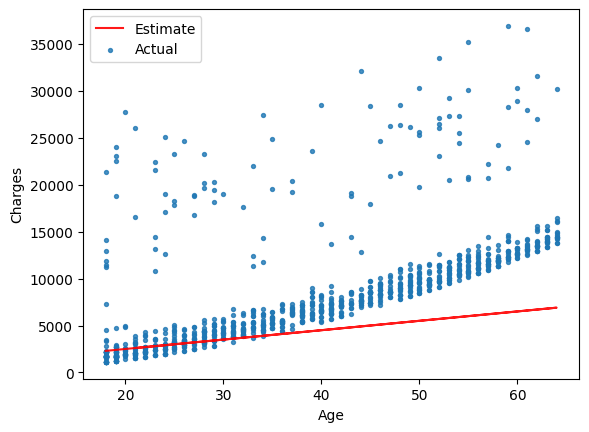

In [ ]:
w1 = 100
b1 = 500
try_parameters(non_smoker_df, w1, b1)

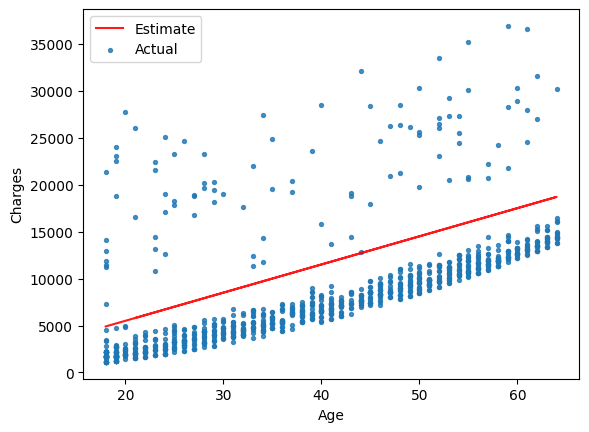

In [ ]:
w2 = 300
b2 = -500
try_parameters(non_smoker_df, w2, b2)

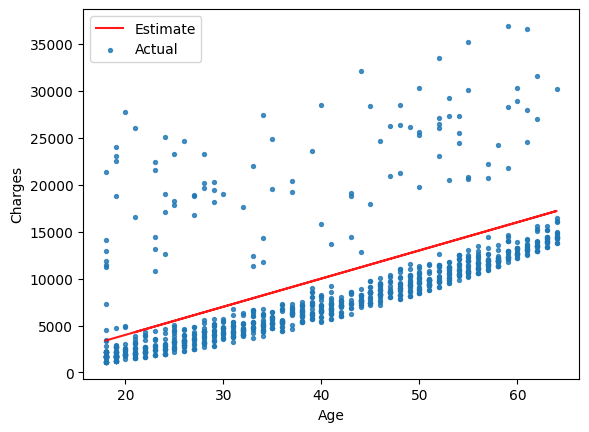

In [ ]:
w3 = 300
b3 = -2000
try_parameters(non_smoker_df, w3, b3)

**Спостереження:**
- Дані серед некурців розділились на 2 категорії - "група здоровя" та некурці з певними захворюваннями (що збільшують витрати на страховку, що є логічним)
- З віком витрати на медичне страхування збільшуються
- Методом проб підібрали коефіцінти прогнозування витрат для некурців, склавши формулу: charges = 300*age - 2000

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [ ]:
import numpy as np

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
targets = non_smoker_df['charges']

In [ ]:
prediction_1 = estimate_charges(non_smoker_df['age'], w1, b1)
rmse(targets, prediction_1)

np.float64(6576.299390690054)

In [ ]:
prediction_2 = estimate_charges(non_smoker_df['age'], w2, b2)
rmse(targets, prediction_2)

np.float64(5500.326344903785)

In [ ]:
prediction_3 = estimate_charges(non_smoker_df['age'], w3, b3)
rmse(targets, prediction_3)

np.float64(4884.627957453161)

**Спостереження:**
1. Серед обраних коефіцієнтів у завданні 5 показали кращий результат rmse третя пара w3, b3
2. Стратегія пошуку оптимального варіанту методом проб і помилок:
  - Обираємо стартові коефіцієнти для отримання стартової картинки
  - Візуально коригуємо кут нахилу (w) та зміщення по вертикальній осі (b) для глобального візуального співнаправлення прогностичної лінії та загального скупчення даних
  - Там де вже важко візуально прорахувати покращення ефектичності прогнозу - проводимо калібрування почергово коефіцієнтів на великих, середніх та малих калібрах
  
  наприклад b3 = -2000,
  пробуємо зміну rmse при зміні коефіцієнту на 1000 і так поки не почнеться погіршення ефективності (що говорить що пройшли межу)
  далі роюимо крок назад і змінюємо калібр (крок) з 1000 до 100,
  так само знаходимо межу і змінюємо калібр з 100 до 10 і далі з 10 до 1.

  Нижче результат калібрування:

np.float64(4678.073430747491)

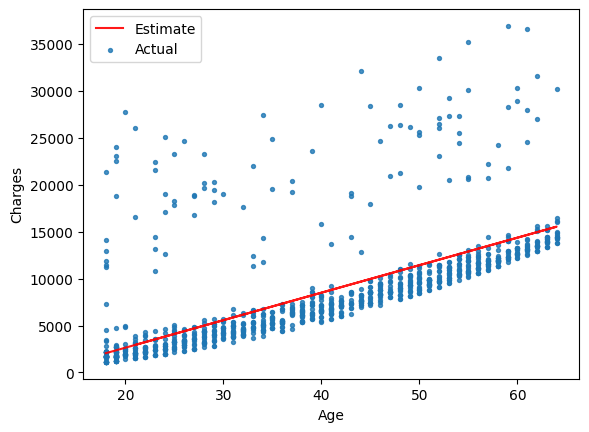

In [ ]:
w4 = 293
b4 = -3224
try_parameters(non_smoker_df, w4, b4)

prediction_4 = estimate_charges(non_smoker_df['age'], w4, b4)
rmse(targets, prediction_4)